In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot 
from scipy import interp
import scipy.stats
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')


In [3]:
df = pd.read_csv("../RESULTS/deepbake.s10.predictions.fixed2.tsv",sep="\t")
df.head()

,season,baker,week,tech_mean,tech,starbaker_mean,starbaker,judge_fav_mean,judge_fav,judge_unfav_mean,judge_unfav,place,deepbake_tier,week_eliminated,deepbake_prediction,winner_prob,finalist_prob,third_fourth_prob,fifth_seventh_prob,eighth_below_prob
0,10,Alice,1,5.00,5,0.00,0,0.00,0,0.00,0,2,1,10,1,11.20,29.70,15.49,28.09,26.72
1,10,Alice,2,3.00,1,0.50,1,0.50,1,0.00,0,2,1,10,1,33.97,85.52,2.06,9.98,2.44
2,10,Alice,3,4.33,7,0.33,0,0.33,0,0.33,1,2,1,10,3,14.17,29.37,20.81,32.60,17.23
3,10,Alice,4,5.25,8,0.25,0,0.25,0,0.25,0,2,1,10,1,17.38,41.18,24.21,31.49,3.13
4,10,Alice,5,5.40,6,0.20,0,0.20,0,0.20,0,2,1,10,1,6.58,45.57,19.00,33.14,2.30


In [4]:
df = pd.read_csv("../RESULTS/deepbake.s10.predictions.fixed2.tsv",sep="\t")
df['match']=np.where(df['deepbake_prediction']==df['deepbake_tier'],1,0)
for w in sorted(set(df['week'])):
    t = df.loc[df['week']==w]
    tp = len([x for x in t['match'] if x == 1])
    fp = len([x for x in t['match'] if x == 0])
    acc = tp / (tp+fp)
    print(acc,w)

0.38461538461538464 1
0.46153846153846156 2
0.46153846153846156 3
0.6153846153846154 4
0.6923076923076923 5
0.6923076923076923 6
0.6923076923076923 7
0.8461538461538461 8
0.7692307692307693 9
0.6153846153846154 10


In [26]:
a=[
1,
1,
1,
0,
0,
1,
1,
0,
1,
1,
1,
0]

tp = len([x for x in a if x == 1])
fp = len([x for x in a if x == 0])
print(tp/(tp+fp))

0.6666666666666666


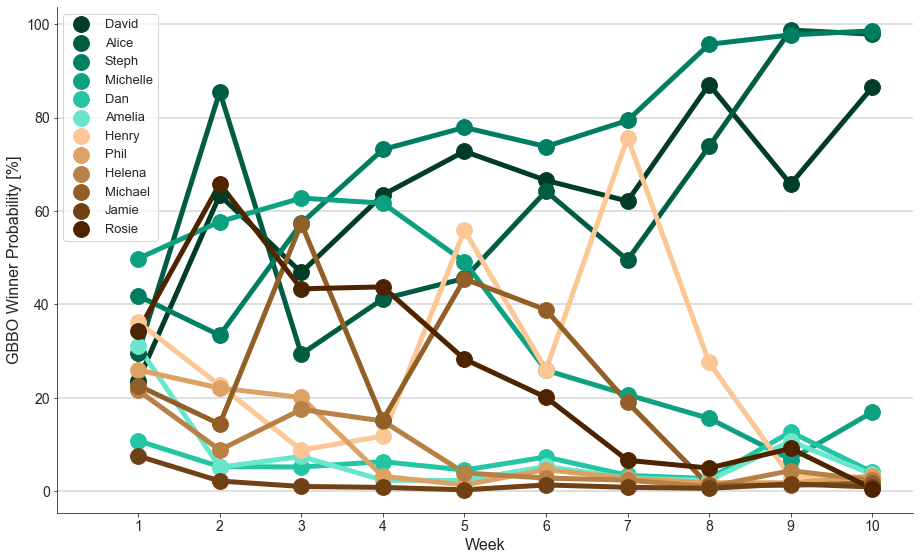

In [18]:
from collections import OrderedDict 

def plot_gbbo_probs(df,prob,ax,colr,lab):
    sns.set_style("white")
    
    for baker in colr:    
        tmp = df.loc[df['baker']==baker]
        
        ax.scatter(
            x=tmp['week'],
            y=tmp[prob],
            color=colr[baker],
            #edgecolor='.9', #'#dfdfdf',
            s=250,
            #linewidth=2,
            zorder=5,
            label=baker
        )
        
        ax.plot(
            tmp['week'],
            tmp[prob],
            color=colr[baker],
            linewidth=5,
            zorder=4,
            label='',
        )
        
    buff=0.5
    ax.legend(fontsize=13)
    vapeplot.despine(ax)
    ax.set_ylabel(lab,fontsize=16)
    ax.set_xlabel("Week",fontsize=16)
    ax.set_xticks(list(range(1,max(df['week'])+1)))
    ax.set_xlim(0,max(df['week'])+buff)
    ax.yaxis.grid(which="major", color='#dfdfdf', linestyle='-', linewidth=2)

col=['#4e2400', '#6f4114', '#935f29', '#b88044', '#dea164', '#fbc794', '#69e6cc', '#23c5a3', '#0da181', '#007e61', '#005c42', '#003c26']        
#col=['#122771', '#4b53a4', '#8483d3', '#bcb8fa', '#f5f5f5', '#fcafac', '#f16569', '#c4232d', '#7f0000']
#col=['#122771', '#2a3581', '#3d4491', '#4f53a1', '#6162b1', '#7272c2', '#8483d3', '#c15e4c', '#ae4d3d', '#9c3c2e', '#8a2b20', '#781812', '#660000']
#['#122771', '#8483d3', '#f5f5f5', '#d36f5c', '#660000']
#['#122771', '#5e62b6', '#a9a6ed', '#f2967f', '#b54839', '#680000']
#['#122771', '#5e62b6', '#a9a6ed', '#f5f5f5', '#f79579', '#be4532', '#6d0000']
colrs=list(reversed(col))
lost = []#['Dan','Jamie','Amelia','Phil','Helena','Michelle','Priya','Michael','Henry']
gbbo=df
#gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
#remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['week','winner_prob'])
tmp = gbbo.loc[gbbo['week']==max(gbbo['week'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(13,8))

plot_gbbo_probs(gbbo,'finalist_prob',ax,colr_dict,'GBBO Winner Probability [%]')

f.tight_layout()
#f.savefig("../FIGURES/gbbo.winner.running.probs.{}.png".format(timestamp()),dpi=500)
#f.savefig("../FIGURES/gbbo.winner.running.probs.{}.svg".format(timestamp()),dpi=500)

1
2
3
4
5
6
7
8
9
10


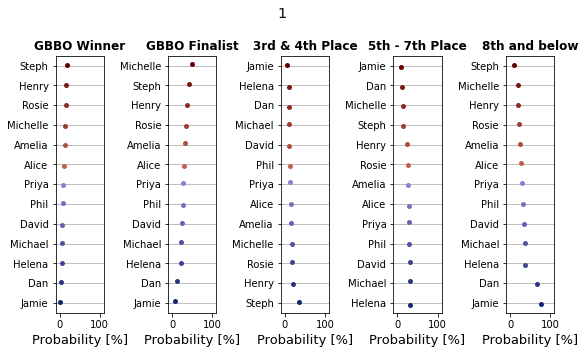

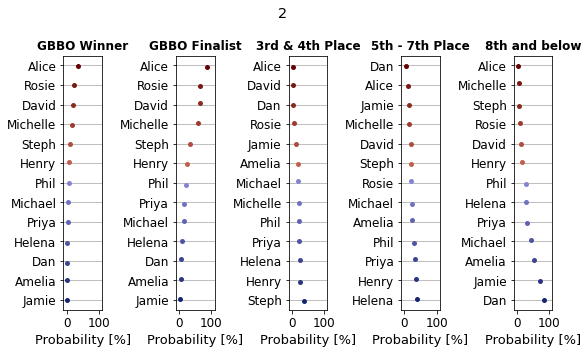

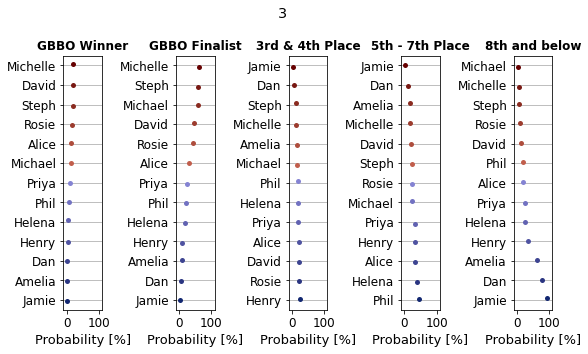

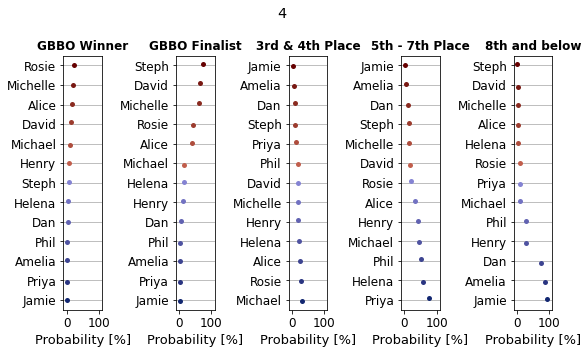

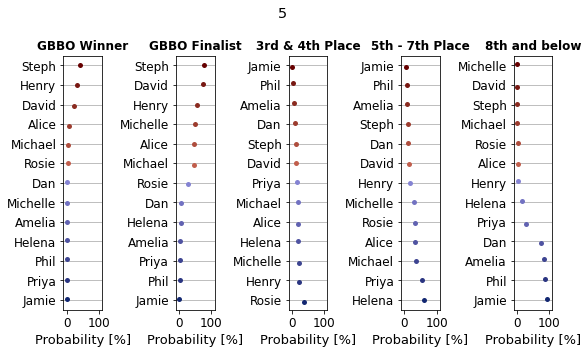

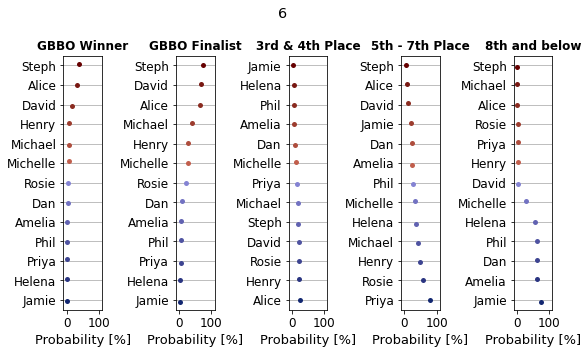

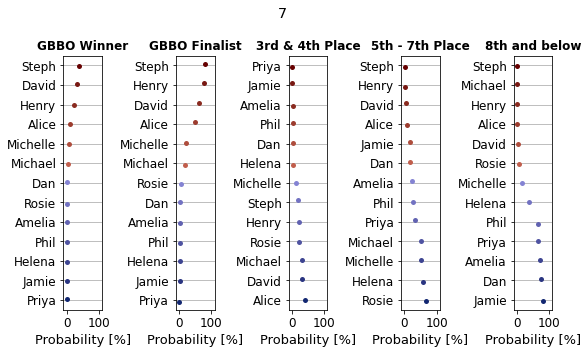

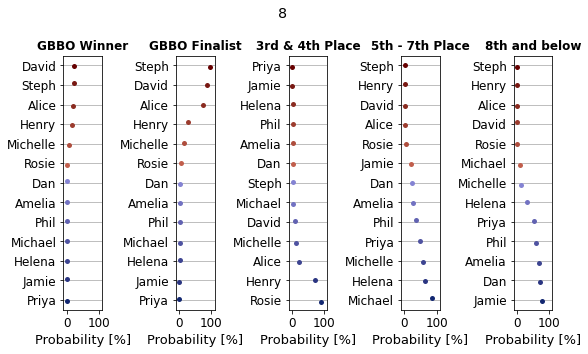

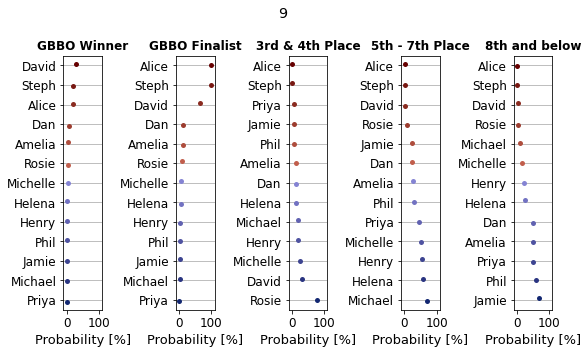

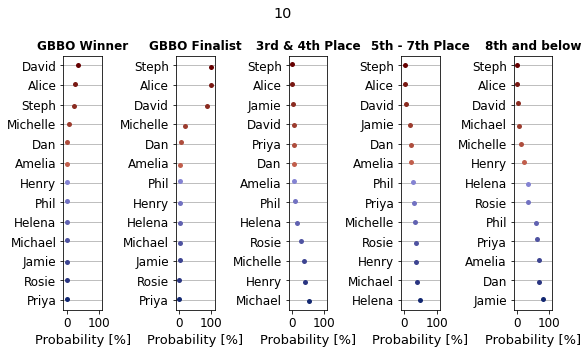

In [9]:
def plot_probs(df,x,xlab,ax,xmin=-9,xmax=100):
    col=['#122771', '#2a3581', '#3d4491', '#4f53a1', '#6162b1', '#7272c2', '#8483d3', '#c15e4c', '#ae4d3d', '#9c3c2e', '#8a2b20', '#781812', '#660000']
    colrs=reversed(col)

    vapeplot.font_size(12)
    #f, ax = plt.subplots(1,1,figsize=(2.5,5*2.5))
    sns.stripplot(
        y='baker',
        x=x,
        data=df,
        ax=ax,
        palette=colrs
    )
    ax.set_ylabel('')
    ax.yaxis.grid(True)
    ax.set_xlim(xmin,xmax)
    ax.set_title(xlab,fontsize=12,weight='bold')
    ax.set_xlabel('Probability [%]',fontsize=13)

nrow=1
ncol=5
#lost = ['Dan','Jamie','Amelia','Phil','Helena','Michelle','Priya','Michael','Henry']
#gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
#remaining_bakers = len(set(gbbo['baker']))
#print(remaining_bakers)
df = pd.read_csv("../RESULTS/deepbake.s10.predictions.fixed2.tsv",sep="\t")
gbbo=df

GBBO=df
for w in sorted(set(GBBO['week'])):
    gbbo = GBBO.loc[GBBO['week']==w]

    f, ax = plt.subplots(nrow,ncol,figsize=(8,5))

    plot_probs(gbbo.sort_values(ascending=False,by=['winner_prob'])
           ,'winner_prob','GBBO Winner',ax[0],-10,110)   
    plot_probs(gbbo.sort_values(ascending=False,by=['finalist_prob']),
           'finalist_prob','GBBO Finalist',ax[1],-10,110)
    plot_probs(gbbo.sort_values(ascending=True,by=['third_fourth_prob']),
           'third_fourth_prob','3rd & 4th Place',ax[2],-10,110)

    plot_probs(gbbo.sort_values(ascending=True,by=['fifth_seventh_prob']),
           'fifth_seventh_prob','5th - 7th Place',ax[3],-10,110)

    plot_probs(gbbo.sort_values(ascending=True,by=['eighth_below_prob']),
           'eighth_below_prob','8th and below',ax[4],-10,110)

    f.suptitle(w)
    f.tight_layout()
    f.show()
    print(w)


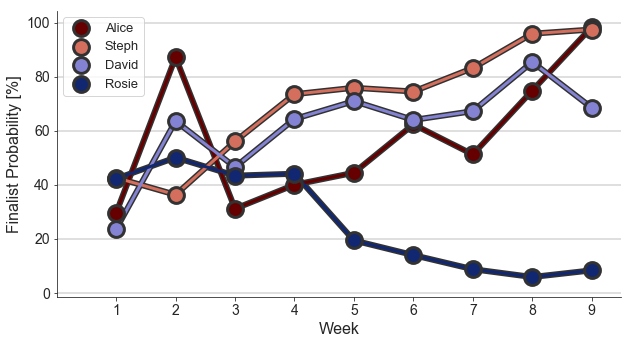

In [4]:
col=['#122771', '#8483d3', '#d36f5c', '#660000']
colrs=list(reversed(col))
gbbo=df
#gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','top3'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'top3',ax,colr_dict,'Finalist Probability [%]')

f.tight_layout()
f.savefig("../FIGURES/gbbo.finalist.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.finalist.running.probs.{}.svg".format(timestamp()),dpi=500)

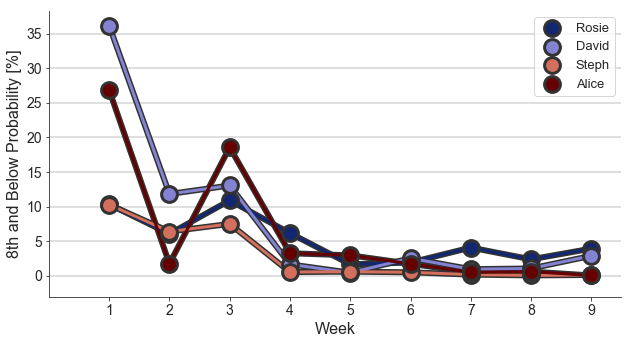

In [5]:
col=['#122771', '#8483d3', '#d36f5c', '#660000']
colrs=col
#colrs=list(reversed(col))
gbbo=df
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','bottom'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'bottom',ax,colr_dict,'8th and Below Probability [%]')


f.tight_layout()
f.savefig("../FIGURES/gbbo.bottom.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.bottom.running.probs.{}.svg".format(timestamp()),dpi=500)

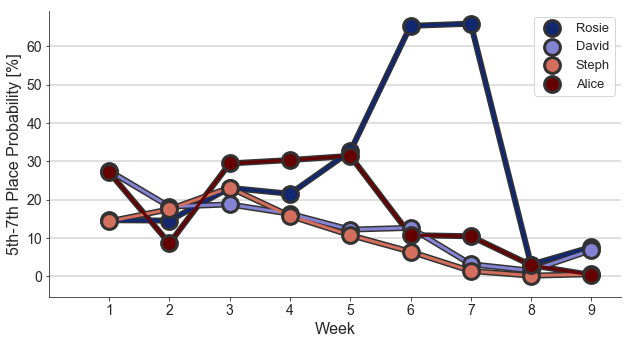

In [6]:
col=['#122771', '#8483d3', '#d36f5c', '#660000']
colrs=col
#colrs=list(reversed(col))
#lost = ['Dan','Jamie','Amelia','Phil','Helena','Michelle']
gbbo=df
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','fifthseventh'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'fifthseventh',ax,colr_dict,'5th-7th Place Probability [%]')


f.tight_layout()
f.savefig("../FIGURES/gbbo.5th-7th.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.5th-7th.running.probs.{}.svg".format(timestamp()),dpi=500)

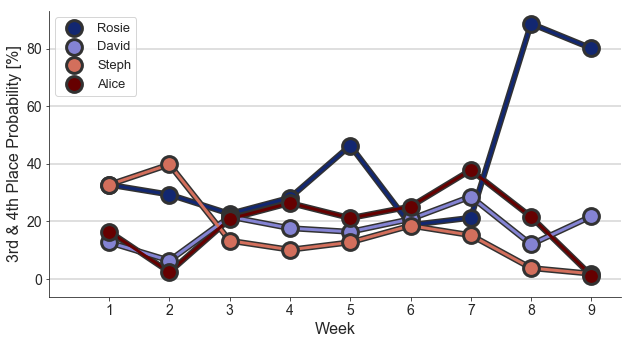

In [7]:
col=['#122771', '#8483d3', '#d36f5c', '#660000']
colrs=col
#colrs=list(reversed(col))
#lost = ['Dan','Jamie','Amelia','Phil','Helena','Michelle']
gbbo=df
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))
gbbo = gbbo.sort_values(ascending=False,by=['episode','thirdforth'])
tmp = gbbo.loc[gbbo['episode']==max(gbbo['episode'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

vapeplot.font_size(14)
f,ax = plt.subplots(1,1,figsize=(9,5))

plot_gbbo_probs(gbbo,'thirdforth',ax,colr_dict,'3rd & 4th Place Probability [%]')


f.tight_layout()
f.savefig("../FIGURES/gbbo.3rd-4th.running.probs.{}.png".format(timestamp()),dpi=500)
f.savefig("../FIGURES/gbbo.3rd-4th.running.probs.{}.svg".format(timestamp()),dpi=500)

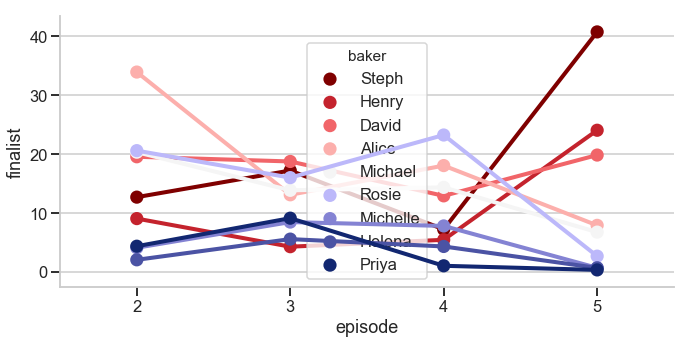

In [53]:
col=['#122771', '#4b53a4', '#8483d3', '#bcb8fa', '#f5f5f5', '#fcafac', '#f16569', '#c4232d', '#7f0000']
colrs=reversed(col)
lost = ['Dan','Jamie','Amelia','Phil']
gbbo=df
gbbo = gbbo.sort_values(ascending=False,by=['episode','finalist'])
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))

f,ax = plt.subplots(1,1,figsize=(11,5))

sns.set_style("whitegrid")
#sns.set_context("talk")
#sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 1})

sns.pointplot(
    x="episode",
    y="finalist",
    hue="baker",
    data=gbbo,
    ax=ax,
    palette=colrs,
    markeredgecolor=2,
    edgecolor='k'

)

vapeplot.despine(ax)

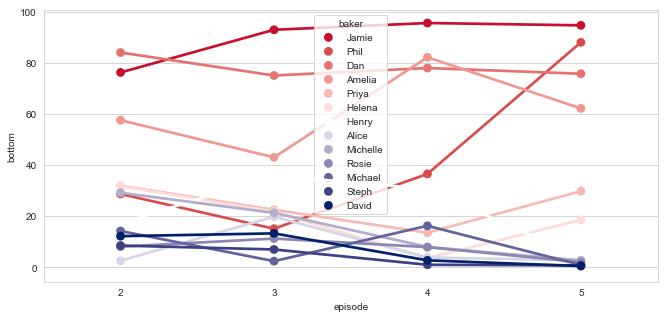

In [37]:
col=['#012169', '#3d4081', '#64629a', '#8b87b2', '#b1adcc', '#d7d5e5', '#ffffff', '#fddcd9', '#f8b9b4', '#f09790', '#e5736d', '#d84c4d', '#c8102e']
colrs=reversed(col)
#lost = ['Dan','Jamie','Amelia','Phil']
#gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
gbbo=df
gbbo = gbbo.sort_values(ascending=False,by=['episode','bottom'])
remaining_bakers = len(set(gbbo['baker']))

f,ax = plt.subplots(1,1,figsize=(11,5))
sns.pointplot(
    x="episode",
    y="bottom",
    hue="baker",
    data=gbbo,
    ax=ax,
    palette=colrs

)

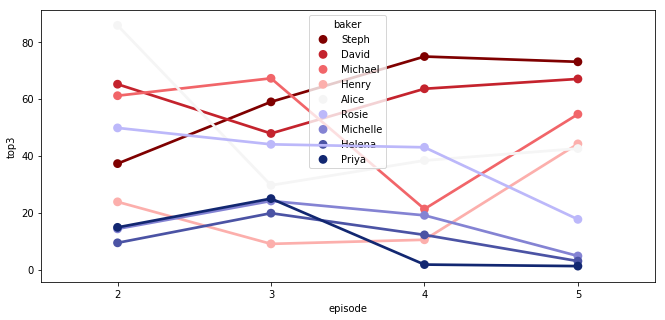

In [24]:
col=['#122771', '#4b53a4', '#8483d3', '#bcb8fa', '#f5f5f5', '#fcafac', '#f16569', '#c4232d', '#7f0000']
colrs=reversed(col)
lost = ['Dan','Jamie','Amelia','Phil']
gbbo=df
gbbo = gbbo.sort_values(ascending=False,by=['episode','top3'])
gbbo = gbbo.loc[~gbbo['baker'].isin(lost)]
remaining_bakers = len(set(gbbo['baker']))

f,ax = plt.subplots(1,1,figsize=(11,5))
sns.pointplot(
    x="episode",
    y="top3",
    hue="baker",
    data=gbbo,
    ax=ax,
    palette=colrs

)